<h4>Classification Optimization</h4>



In [35]:
# import the necessary Python modules
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from ctgan import CTGAN

# boxplot version
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Here the data is loaded 
# encountered an because of the type of dataset
# Solution, I used the encoding='ISO-8859-1'
# Specify an alternative encoding, such as ISO-8859-1
pd.set_option('display.float_format', '{:.1f}'.format)
df = pd.read_csv("car_purchasingNew.csv", encoding='ISO-8859-1')

In [3]:
df.head()

,customer name,JobTitle,customer e-mail,country,gender,age,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,credit card debt,net worth,car purchase amount
0,Martina Avila,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,42,167411.18,0.00,400184.25,NaN,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,CAPTAIN III (POLICE DEPARTMENT),eu.dolor@diam.co.uk,Belize,0,41,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,CAPTAIN III (POLICE DEPARTMENT),vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,WIRE ROPE CABLE MAINTENANCE MECHANIC,malesuada@dignissim.com,Cook Islands,1,58,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,Cedric Leach,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,5358.712177,560304.0671,55915.46248


In [4]:
# this code shows the title columns
df.columns

Index(['customer name', 'JobTitle', 'customer e-mail', 'country', 'gender',
       'age', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'TotalPayBenefits', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [5]:
# the columns name were named
df.rename(columns={'customer name': 'customer_name', 
                   'customer e-mail': 'customer_email',
                     'annual Salary': 'annual_Salary',
                       'credit card debt':'credit_card_debt', 'car purchase amount':'car_purchase_amount'}, inplace=True)

In [6]:
# Dropping the following columns
df = df.drop([ 'JobTitle', 'customer_email', 'country',], axis=1)


In [8]:
# Column 'Benefits' was included because it has many NaN values
df = df.drop(['customer_name', 'Benefits', 'gender'], axis=1)

In [9]:
# After renaming some columns then I
# as well as dropping some columns
# then next step is to
# save the dataset to a new CSV file
df.to_csv("car_purchasingNew1.csv", index=False) 

In [10]:
df

,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net worth,car_purchase_amount
0,42,167411.18,0.00,400184.25,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,41,155966.02,245131.88,137811.38,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,43,212739.13,106088.18,16452.60,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,58,77916.00,56120.71,198306.90,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,57,134401.60,9737.00,182234.59,326373.19,326373.19,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,41,87384.60,97729.16,837.79,185951.55,185951.55,6995.902524,541670.1016,48901.44342
496,38,123105.00,38790.92,23865.00,185760.92,185760.92,12301.456790,360419.0988,31491.41457
497,54,185724.50,0.00,0.00,185724.50,185724.50,10611.606860,764531.3203,64147.28888
498,59,185724.50,0.00,0.00,185724.50,185724.50,14013.034510,337826.6382,45442.15353


<h4>Here is using the CTGAN tool method to generate synthetic data</h4>

In [14]:
print(df.columns)

Index(['customer name', 'JobTitle', 'customer e-mail', 'country', 'gender',
       'age', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'TotalPayBenefits', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')


In [22]:
# pd.set_option('display.float_format', '{:.1f}'.format)
df = pd.read_csv("car_purchasingNew1.csv", encoding='ISO-8859-1')

In [23]:
print(df.columns)

Index(['age', 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay',
       'TotalPayBenefits', 'credit_card_debt', 'net worth',
       'car_purchase_amount'],
      dtype='object')


In [ ]:
# the target is 'car_purchase_amount'
target = "car_purchase_amount"

# My arm is to generate data only for the part of distribution 
# where car_purchase_amount is over 50 thousand
# I chose the amount because 
# there are lesser amount than 100000
subset_df = df[df['car_purchase_amount'] > 50000]

# typical X/y split, choose target variable as needed
X = df.drop([target], axis=1)
y = df[target]

# data = X.copy()
# data[target] = y

ctgan = CTGAN()
ctgan.fit(subset_df, epochs=100)

num_new_data = 10000
synthetic_df = ctgan.sample(num_new_data)

In [28]:
print(subset_df.info())
print(subset_df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 3 to 497
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  137 non-null    int64  
 1   BasePay              137 non-null    float64
 2   OvertimePay          137 non-null    float64
 3   OtherPay             137 non-null    float64
 4   TotalPay             137 non-null    float64
 5   TotalPayBenefits     137 non-null    float64
 6   credit_card_debt     137 non-null    float64
 7   net worth            137 non-null    float64
 8   car_purchase_amount  137 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 10.7 KB
None
    age  BasePay  OvertimePay  OtherPay  TotalPay  TotalPayBenefits  \
3    58  77916.0      56120.7  198306.9  332343.6          332343.6   
4    57 134401.6       9737.0  182234.6  326373.2          326373.2   
5    57 118602.0       8601.0  189082.7  316285.7          316285.7   
10   50 194

In [ ]:
# Then combine with original data
df = pd.concat([df, synthetic_df])

<Axes: xlabel='car_purchase_amount', ylabel='Count'>

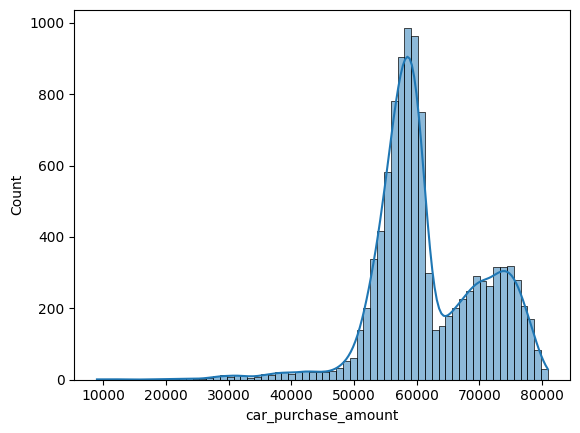

In [ ]:
# It can be seen the distribution is not quite normal
# I would it is quite skewed towards left (skewed-left)
# we can now see the second "bump", that's where the new data is
sns.histplot(data=df, x="car_purchase_amount", kde=True)

In [ ]:
# the statiscal information
df.describe()

,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net worth,car_purchase_amount
count,10500.0,10500.0,10500.0,10500.0,10500.0,10500.0,10500.0,10500.0,10500.0
mean,57.7,163320.4,76395.7,68970.0,186317.4,211080.1,14699.6,685049.7,61664.8
std,9.0,50096.5,54489.0,72922.8,21749.9,27777.1,4252.9,222901.6,8709.9
min,20.0,25400.0,-28715.3,-87981.2,109026.7,128189.1,100.0,-4713.8,9000.0
25%,51.0,127724.6,20730.2,18893.2,175544.6,193356.3,11899.2,530242.2,56563.8
50%,59.0,159210.6,80600.3,36102.0,183143.4,204872.9,15276.0,704813.7,59622.7
75%,65.0,194980.1,120723.0,106783.2,193537.5,222494.8,18008.9,858019.0,68555.4
max,76.0,368246.3,245131.9,400184.2,567595.4,567595.4,23043.8,1183171.7,80911.5


<h4>The columns related to pay such as BasePay, OvertimePay, OtherPay, TotalPay have relatively large standard deviations, meaning these values are spread out quite a bit (over fit). I think the distribution might be right-skewed, with a small number of individuals receiving much higher pay. These features perhaps be combined together due to the relationship between them.
I also think the net worth and credit_card_debt columns have significant variability, which might imply that there's a broad range of financial profiles in the dataset, from individuals with low or no debt to individuals with significant assets.
Also, I believe the car_purchase_amount probably have substantial range and relatively high standard deviation, indicating that while most people spend around 60,000, some spend significantly more or less.</h4>

In [32]:
# For the purpose of visualizations. its imperative binning creates a categorical variable
# as it is a continuous variable (car_purchase_amoun), making visualizations easy here
# And the bins create the car_purchase_amount into five categories

df = df.query('car_purchase_amount < car_purchase_amount.quantile(q=0.98)')

df['binned_car_purchase_amount'] = pd.cut(df['car_purchase_amount'], bins=5, labels=['Low', 'Below Average', 'Average', 'Above Average', 'High'])

In [33]:
df.head()

,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net worth,car_purchase_amount,binned_car_purchase_amount
0,42,167411.2,0.0,400184.2,567595.4,567595.4,11609.4,238961.3,35321.5,Below Average
1,41,155966.0,245131.9,137811.4,538909.3,538909.3,9573.0,530973.9,45115.5,Average
2,43,212739.1,106088.2,16452.6,335279.9,335279.9,11160.4,638467.2,42925.7,Average
3,58,77916.0,56120.7,198306.9,332343.6,332343.6,14426.2,548599.1,67422.4,High
4,57,134401.6,9737.0,182234.6,326373.2,326373.2,5358.7,560304.1,55915.5,Above Average


<Axes: xlabel='age', ylabel='car_purchase_amount'>

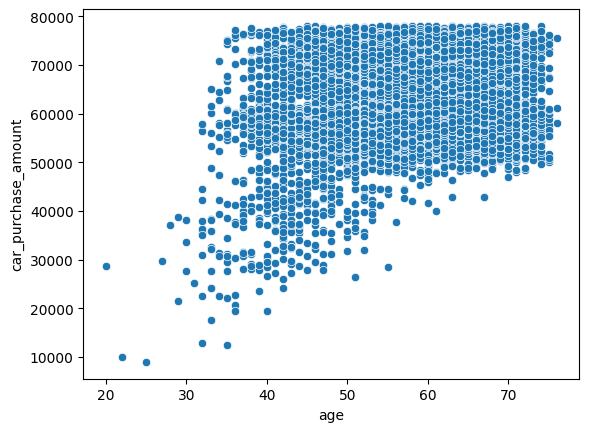

In [ ]:
# checking the outliers for most purchased and car_purchase_aamount
# outliers in the 'age'
# noise can be noticed as well
sns.scatterplot(data=df, x="age", y="car_purchase_amount")

<h4>Overlapping</h4>

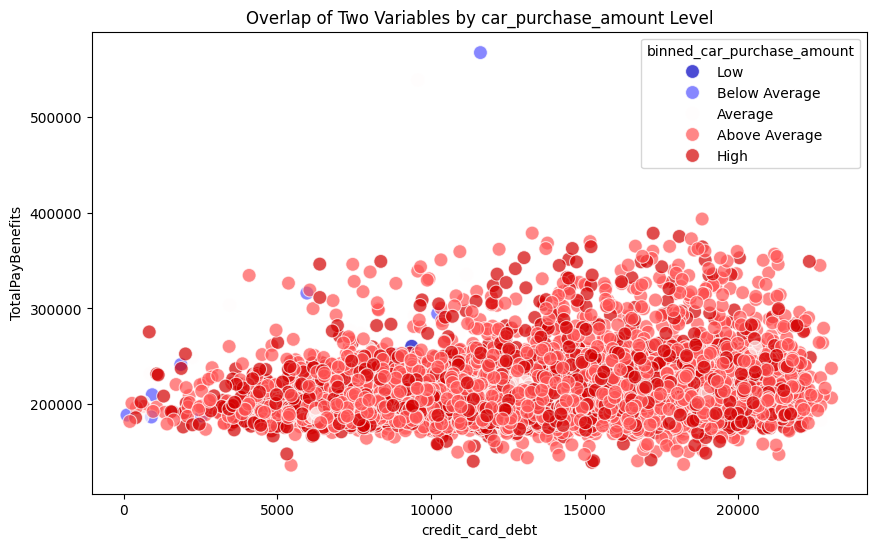

In [ ]:
# Plot setup
# there is overlap in the credit_card_debt 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='credit_card_debt', y='TotalPayBenefits', hue='binned_car_purchase_amount', data=df, palette='seismic', s=100, alpha=0.7)

# Add title and labels
plt.title('Overlap of Two Variables by car_purchase_amount Level')
plt.xlabel('credit_card_debt')
plt.ylabel('TotalPayBenefits')

# Display the plot
plt.show()